In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
N = 256

In [121]:
#with open("r60_s10000.pkl","rb") as f:
#with open("no_halo_new.pkl","rb") as f:
with open("r125_s1000_N256.pkl","rb") as f:
    a = pkl.load(f)

In [122]:
g = a['Gamma']
print(g.mean())
print(g.std())

5.644639013519553e-13
5.1922777800516035e-14


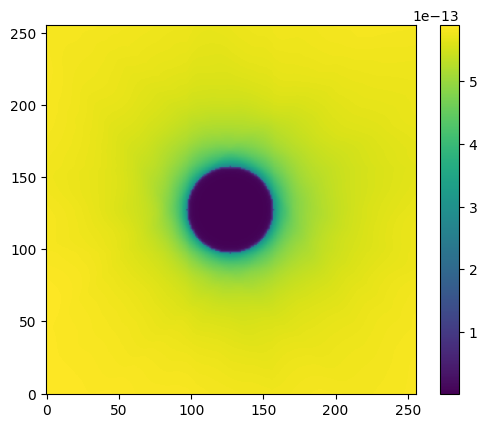

In [124]:
plt.imshow(g[:,:,127].T,origin='lower')
plt.colorbar()

In [103]:
g[127,63,63]

5.740587576995587e-13

In [114]:
gridspace = np.arange(1,N+1)
boxsize = 0.01
dr = boxsize / N
halo_center = N//2-1
R_halo = 30
R_halo_phys = R_halo * dr
halo_center_phys = halo_center * dr
r_from_halo = gridspace - halo_center
r_from_halo_phys = r_from_halo * dr

In [105]:
gamma0 = 6.080420899608269e-13
def gamma_an(r):
    #theta = np.arctan(R_halo_phys/(2*r))
    #Om = 2*np.pi*(1-np.cos(theta))
    #Om_over_4pi = Om / (4*np.pi)
    Om_over_4pi = 0.5 * (1 - 1.0/np.sqrt(1+(R_halo_phys/(r))**2))
    val = gamma0 * (1-Om_over_4pi)
    val = gamma0 * (1-R_halo_phys**2/(4*r**2))
    return np.where(np.abs(r) > R_halo_phys,val,np.nan)

In [106]:
gslice = g[:,halo_center,halo_center]

/tmp/ipykernel_24312/40142859.py:6: RuntimeWarning: divide by zero encountered in divide
  Om_over_4pi = 0.5 * (1 - 1.0/np.sqrt(1+(R_halo_phys/(r))**2))
/tmp/ipykernel_24312/40142859.py:8: RuntimeWarning: divide by zero encountered in divide
  val = gamma0 * (1-R_halo_phys**2/(4*r**2))


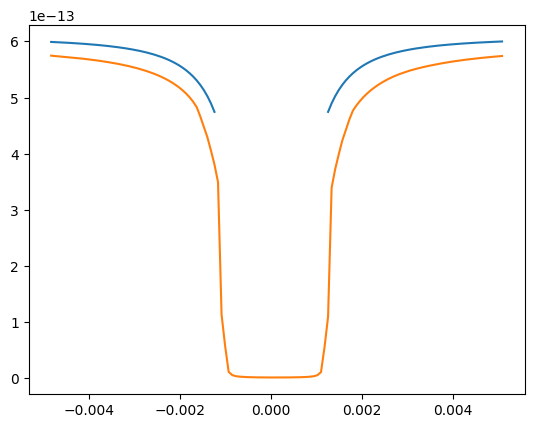

In [107]:
plt.plot(r_from_halo_phys,gamma_an(r_from_halo_phys))
plt.plot(r_from_halo_phys,gslice)

In [108]:
with open("r60_s10000.pkl","rb") as f:
    a = pkl.load(f)
    slice_a = a['Gamma'][:,halo_center,halo_center]
with open("r30_s10000.pkl","rb") as f:
    b = pkl.load(f)
    slice_b = b['Gamma'][:,halo_center,halo_center]

In [135]:
with open("r125_s1000_N256.pkl","rb") as f:
    c = pkl.load(f)
    slice_c = c['Gamma'][:,halo_center,halo_center]
with open("r60_s1000_N256.pkl","rb") as f:
    d = pkl.load(f)
    slice_d = d['Gamma'][:,halo_center,halo_center]
with open("r60_s1000_N256.pkl","rb") as f:
    e = pkl.load(f)
    slice_e = e['Gamma'][:,halo_center,halo_center]

/tmp/ipykernel_24312/40142859.py:6: RuntimeWarning: divide by zero encountered in divide
  Om_over_4pi = 0.5 * (1 - 1.0/np.sqrt(1+(R_halo_phys/(r))**2))
/tmp/ipykernel_24312/40142859.py:8: RuntimeWarning: divide by zero encountered in divide
  val = gamma0 * (1-R_halo_phys**2/(4*r**2))


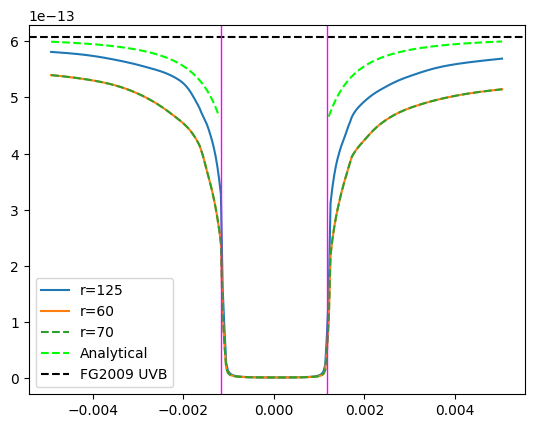

In [137]:
#plt.plot(r_from_halo_phys,slice_a,label="r=60")
#plt.plot(r_from_halo_phys,slice_b,label="r=30")
plt.plot(r_from_halo_phys,slice_c,label="r=125")
plt.plot(r_from_halo_phys,slice_d,label="r=60")
plt.plot(r_from_halo_phys,slice_e,label="r=70",ls='--')
plt.plot(r_from_halo_phys,gamma_an(r_from_halo_phys),label="Analytical",color='lime',ls='--')
plt.axhline(gamma0,ls='--',color='black',label="FG2009 UVB")
plt.axvline(-R_halo_phys,color='magenta',lw=1)
plt.axvline(+R_halo_phys,color='magenta',lw=1)
plt.legend()
#plt.yscale('log')